In [1]:
import numpy as np
import imageio
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.misc
from skimage.transform import resize

In [2]:
percentage_train_test = 0.5
batch_size = 5

In [3]:
indexes = np.arange(10)
np.random.shuffle(indexes)
np.random.choice(indexes, 2)

array([1, 7])

In [4]:
ind_train = indexes[:int(len(indexes)*percentage_train_test)]
ind_test = indexes[int(len(indexes)*percentage_train_test):]
ind_test

array([8, 0, 3, 1, 4])

In [5]:
dataX = np.empty((batch_size, 224, 224, 3))
dataX_test = []
dataX.shape

(5, 224, 224, 3)

In [7]:
#All this is inside the for loop for training, every step
count = 0
for image_path in [100,200,300]:
    dataX[count] = imageio.imread('dataX/'+str(image_path)+'.png')
    dataX_test.append(imageio.imread('dataX/'+str(image_path)+'.png'))
    count += 1
dataX.shape

(5, 224, 224, 3)

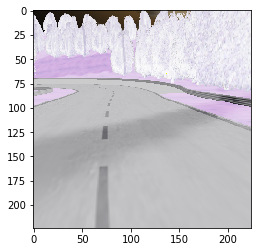

In [11]:
plt.imshow(dataX[1])
plt.show()
#For some reason, dataX is not well interpreted by imshow even though contains the same numbers

In [12]:
rgb_sum = 0
for image_path in range(15000):
    rgb_sum += np.mean(np.asarray(imageio.imread('dataX/'+str(image_path)+'.png')), axis=(0,1))
mean_image = rgb_sum/15000
mean_image

array([ 86.49175515,  91.82099339,  88.3039215 ])

In [9]:
test_image = np.asarray(imageio.imread('dataX/'+str(image_path)+'.png'))
diff = test_image - mean_image

In [52]:
df_loaded = pd.read_csv('dataY.csv', index_col=0)

In [53]:
dataY = df_loaded[['angle','radius','trackPos']].as_matrix()
print(dataY.shape, type(dataY))

(15000, 3) <class 'numpy.ndarray'>


In [54]:
dataY;

In [48]:
#Function to normalize data within given range
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

In [49]:
dataY[:,0] = scale_range(dataY[:,0],0.1,1)
dataY[:,1] = scale_range(dataY[:,1],0.1,1)
dataY[:,2] = scale_range(dataY[:,2],0.1,1)

In [55]:
dataY.shape

(15000, 3)

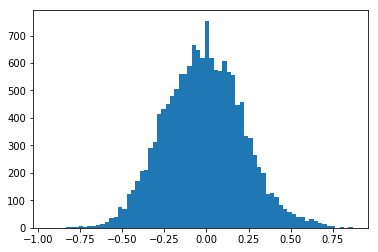

In [56]:
plt.hist(dataY[:,2], bins='auto')
plt.show()

In [57]:
dataY = df_loaded['angle'].as_matrix()
print(dataY.shape, dataY.shape)

(15000,) (15000,)


In [58]:
dataY = dataY*(180/math.pi)

In [59]:
min(dataY)

-42.089708813428331

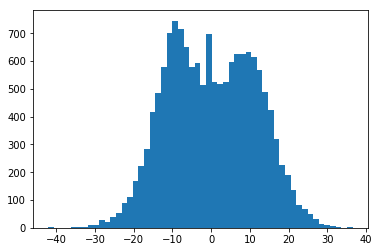

In [60]:
plt.hist(dataY, bins='auto')
plt.show()

In [71]:
df_loaded = pd.read_csv('dataY.csv', index_col=0)
dataY = df_loaded['trackPos'].as_matrix()
np.mean(dataY)
max(dataY)

0.869506

In [72]:
dataY = dataY*8

In [74]:
min(dataY)

-7.5295440000000005